In [1]:
import sys
import os

import pandas as pd
import numpy as np
import scipy 

import matplotlib.pyplot as plt

In [2]:
# ls /Users/colada/work_dir/Helvetas/helvetas/data/02_intermediate/

In [3]:
#script has replicates#

dir_path   = "/Users/colada/work_dir/Helvetas/helvetas/data/02_intermediate/"
file_name  = "enhanced_with_geographic_info.csv"
file_name1 = "preprocessed_helvetas.csv"

df_geo = pd.read_csv("{}{}".format(dir_path, file_name ), sep = ",")
df_pre = pd.read_csv("{}{}".format(dir_path, file_name1 ), sep = ",")

In [4]:
df = df_geo.drop_duplicates()
df_birth    = df.assign(**{"first_donation_year": df.apply(lambda x: int(x["first_donation"][0:4]), axis = 1),
                          "database_year" : df.apply(lambda x: int(x["andat"][0:4]), axis = 1),
                          "last_donation_year": df.apply(lambda x: int(x["last_donation"][0:4]), axis = 1)}).loc[df.gebjah != 0]
df_birth_cl = df_birth.loc[df_birth.gebjah >=1900]


In [5]:
df_birth_processed = df_birth_cl.assign(**{"first_donate_age":  df_birth_cl.first_donation_year - df_birth_cl.gebjah,
                                           "last_donate_age": df_birth_cl.last_donation_year - df_birth_cl.gebjah})
df_birth_corr      = df_birth_processed.loc[df_birth_processed.gebjah<=df_birth_processed.first_donation_year]


In [6]:
df_norm = df_birth_corr.assign(**{"income_per_tax_payer": df_birth_corr["mun_income_kCHF"]/df_birth_corr["mun_n_taxpayers"],
                       "income_per_munpop": df_birth_corr["mun_income_kCHF"]/df_birth_corr["municipality_pop"],
                                 "1/income_per_tax_payer": df_birth_corr["mun_n_taxpayers"]/df_birth_corr["mun_income_kCHF"],
                                "1/income_per_munpop": df_birth_corr["municipality_pop"]/df_birth_corr["mun_income_kCHF"]})



In [7]:
feature_column_norm = ["income_per_munpop", "income_per_tax_payer", "gebjah"]
feature_column = ["mun_income_kCHF", "municipality_pop", "mun_n_taxpayers" "gebjah"]




(array([9.2500e+02, 5.8032e+04, 3.1174e+04, 4.6660e+03, 1.6910e+03,
        7.9700e+02, 6.1800e+02, 1.0000e+02, 0.0000e+00, 7.0000e+00]),
 array([ 42.65      ,  65.10679592,  87.56359184, 110.02038776,
        132.47718367, 154.93397959, 177.39077551, 199.84757143,
        222.30436735, 244.76116327, 267.21795918]),
 <a list of 10 Patch objects>)

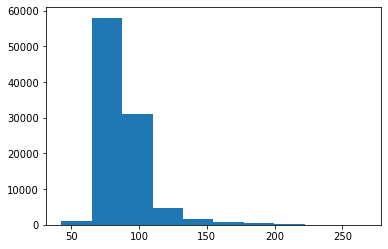

In [8]:
plt.hist(df_norm.income_per_tax_payer)

In [20]:
y = np.array(df_norm["income_per_tax_payer"])
X = np.array(df_norm[["income_per_munpop", "gebjah"]])
#canton age ratio#

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

reg.score(X, y)


reg.coef_
# reg.get_params()

array([ 1.79786118, -0.03903097])

In [10]:
# y = np.array(df_norm["income_per_tax_payer"])
# X = np.array(df_norm[["income_per_munpop", "gebjah", "mun_n_taxpayers",]])

# import numpy as np
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# from sklearn.svm import SVR
# clf = make_pipeline(StandardScaler(), SVR(kernel = "sigmoid", gamma='auto'))
# clf.fit(X, y)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVR(gamma='auto'))])
# # reg.coef_
# # reg.get_params()

In [19]:
y1 = np.array(df_norm["mun_n_taxpayers"])
X1 = np.array(df_norm[["municipality_pop","gebjah", 
                       "mun_income_kCHF"
                      ]])

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline


reg1 = make_pipeline(StandardScaler(), linear_model.LinearRegression())

reg1 =  linear_model.LinearRegression()
reg1.fit(X1,y1)

reg1.score(X1, y1)
# reg1.coef_


0.9977058462675494